In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_v1 = pd.read_csv('clean_tables/1_separate_visits/df_v1_no_na')
df_v2 = pd.read_csv('clean_tables/1_separate_visits/df_v2_no_na')
df_v3 = pd.read_csv('clean_tables/1_separate_visits/df_v3_no_na')

In [19]:
df_continuous_dx = df_v1[['sex', 'age_years', 'years_education', 'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result', 'abeta42_result','mmse_total','gds_total','cdr_sob','LHVL', 'LHVR', 'LHV', 'LWMV','DX']]

In [99]:
df_continuous_AMYL = df_v1[['sex', 'age_years', 'years_education', 'APOE4', 'family_dementia_history', 'ptau_result', 'ttau_result','mmse_total','gds_total','DX','cdr_sob','LHVL', 'LHVR', 'LHV', 'LWMV', 'AMYL']]

In [100]:
df_categorical_dx = df_v1[['sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression','cdr_sob', 'LHVL', 'LHVR', 'LHV', 'VASCULAR','DX']]

In [101]:
df_categorical_AMYL = df_v1[['sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression','cdr_sob', 'DX', 'LHVL', 'LHVR', 'LHV', 'VASCULAR','AMYL']]

In [24]:
df_dx = pd.read_csv('clean_tables/1_separate_visits/df_dx')

In [4]:
df_dx

,dx_v1,dx_v2,dx_v3,dx_change,change,mydxchange,dx_change_final,at_least_two_nans
0,Dem,Dem,Dem,Stable: Dementia,False,False,False,False
1,MCI,Dem,NC,Reversion: MCI to NC,False,False,False,False
2,Dem,NC,Dem,Stable: Dementia,False,False,False,False
3,NaN,NaN,Dem,NaN,False,False,False,True
4,Dem,NC,Dem,Stable: Dementia,False,False,False,False
...,...,...,...,...,...,...,...,...
895,NC,MCI,Dem,Conversion: NC to Dementia,True,False,True,False
896,MCI,Dem,NaN,NaN,False,True,True,False
897,Dem,MCI,MCI,Reversion: Dementia to MCI,False,False,False,False
898,Dem,Dem,NC,Reversion: Dementia to NC,False,False,False,False


We have to remove some indices in dx change

In [25]:
indices_to_remove = df_dx[df_dx['at_least_two_nans']].index
indices_to_remove

Index([  3,  40,  76,  99, 101, 126, 179, 190, 194, 227, 240, 254, 255, 265,
       269, 364, 375, 439, 484, 496, 508, 524, 615, 707, 715, 742, 782, 834],
      dtype='int64')

In [26]:
df_continuous_dx_change = df_v1[['sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'abeta42_result', 'ptau_result', 'ttau_result',
       'mmse_total', 'gds_total','cdr_sob', 'LHVL', 'LHVR', 'LHV', 'LWMV']]

In [27]:
df_categorical_dx_change = df_v1[['sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD',
       'mmse_total', 'Depression','cdr_sob', 'LHVL', 'LHVR', 'LHV', 'VASCULAR']]

In [28]:
df_continuous_dx_change['dx_change'] = df_dx['dx_change_final']
df_categorical_dx_change['dx_change'] = df_dx['dx_change_final']

C:\Users\anaso\AppData\Local\Temp\ipykernel_13816\881178915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_continuous_dx_change['dx_change'] = df_dx['dx_change_final']
C:\Users\anaso\AppData\Local\Temp\ipykernel_13816\881178915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical_dx_change['dx_change'] = df_dx['dx_change_final']


In [106]:
df_continuous_dx_change.shape

(900, 16)

In [29]:
assert df_continuous_dx_change.shape[0] == 900
df_continuous_dx_change = df_continuous_dx_change.drop(indices_to_remove)
df_categorical_dx_change = df_categorical_dx_change.drop(indices_to_remove)

## Store all dataframes

In [30]:
# df_continuous_dx.to_csv('clean_tables/2_preparing_to_train/df_continuous_dx')
# df_categorical_dx.to_csv('clean_tables/2_preparing_to_train/df_categorical_dx')
# df_continuous_AMYL.to_csv('clean_tables/2_preparing_to_train/df_continuous_AMYL')
# df_categorical_AMYL.to_csv('clean_tables/2_preparing_to_train/df_categorical_AMYL')
# df_continuous_dx_change.to_csv('clean_tables/2_preparing_to_train/df_continuous_dx_change')
# df_categorical_dx_change.to_csv('clean_tables/2_preparing_to_train/df_categorical_dx_change')

# DX prediction - preparing dataset

In [190]:
df_continuous_dx=pd.read_csv('clean_tables/2_preparing_to_train/df_continuous_dx')
df_categorical_dx=pd.read_csv('clean_tables/2_preparing_to_train/df_categorical_dx')

In [191]:
df_continuous_dx.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      94
family_dementia_history     0
ptau_result                 0
ttau_result                 0
abeta42_result              0
mmse_total                 82
gds_total                  87
cdr_sob                    87
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
DX                         87
dtype: int64

In [192]:
# remove nas final column
df_continuous_dx = df_continuous_dx.dropna(axis=0, subset=['DX'], inplace=False)
df_categorical_dx = df_categorical_dx.dropna(axis=0, subset=['DX'], inplace=False)

In [193]:
df_categorical_dx.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      84
family_dementia_history     0
AMYL                        0
TAUO                        0
NEUROD                      0
mmse_total                 81
Depression                  0
cdr_sob                     0
LHVL                        0
LHVR                        0
LHV                         0
VASCULAR                    0
DX                          0
dtype: int64

In [194]:
df_continuous_dx

,Unnamed: 0,sex,age_years,years_education,APOE4,family_dementia_history,ptau_result,ttau_result,abeta42_result,mmse_total,gds_total,cdr_sob,LHVL,LHVR,LHV,LWMV,DX
0,0,f,51,11,0.0,Yes,16.3,331.0,1363.0,16.0,9.0,16.5,-1.701,-0.521,-2.221,-0.723,Dem
1,1,m,76,10,2.0,Yes,22.9,223.0,1700.0,14.0,14.0,1.5,0.254,0.025,0.279,0.000,MCI
2,2,f,61,14,0.0,Yes,19.8,202.0,1406.0,15.0,NaN,5.5,-0.642,-0.657,-1.299,0.210,Dem
4,4,m,56,19,2.0,Yes,8.0,170.0,1094.0,20.0,14.0,10.5,-0.909,-0.139,-1.048,-0.827,Dem
5,5,f,80,19,2.0,Yes,41.4,231.0,1329.0,17.0,17.0,0.5,-0.025,-0.679,-0.703,0.379,MCI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,un,60,14,NaN,Yes,29.6,273.0,1348.0,18.0,16.0,0.0,0.416,-1.619,-1.203,-1.037,NC
896,896,m,89,12,NaN,Yes,37.9,268.0,1009.0,20.0,12.0,0.5,-0.740,-2.162,-2.901,-1.727,MCI
897,897,m,81,13,1.0,Yes,21.7,382.0,1700.0,15.0,22.0,11.5,0.338,1.311,1.649,-1.433,Dem
898,898,m,70,16,1.0,Yes,26.3,301.0,755.0,13.0,20.0,16.5,0.464,-0.094,0.370,1.524,Dem


In [195]:
df_continuous_dx.columns

Index(['Unnamed: 0', 'sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'ptau_result', 'ttau_result',
       'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LHV', 'LWMV', 'DX'],
      dtype='object')

In [196]:
# find correlation between two columns in a dataframe
correlation_matrix = df_continuous_dx[['age_years','years_education', 'ptau_result', 'ttau_result',
       'abeta42_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LHV', 'LWMV']].corr()

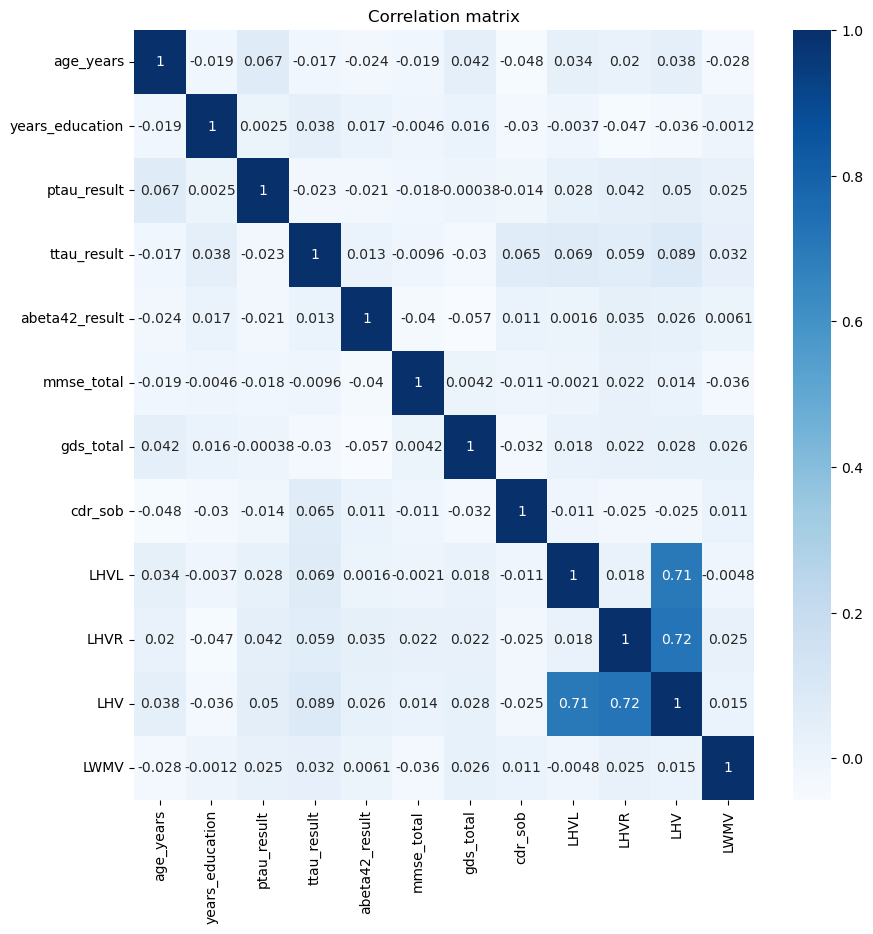

In [197]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix')
plt.show()

We see that LHVL, LHVR are highly correlated with LHV, so we don't use that one

In [198]:
df_continuous_dx = df_continuous_dx.drop(columns=['LHV'])
df_categorical_dx = df_categorical_dx.drop(columns=['LHV'])

In [199]:
df_continuous_dx.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      84
family_dementia_history     0
ptau_result                 0
ttau_result                 0
abeta42_result              0
mmse_total                 81
gds_total                  81
cdr_sob                     0
LHVL                        0
LHVR                        0
LWMV                        0
DX                          0
dtype: int64

<Axes: >

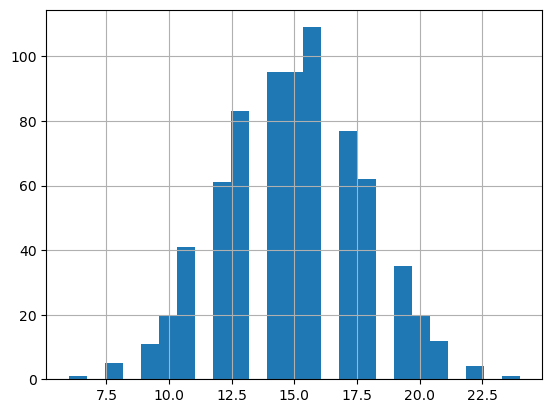

In [200]:
df_continuous_dx['mmse_total'].hist(bins=25)

In [201]:
df_continuous_dx['mmse_total'].describe()

count    732.000000
mean      14.972678
std        2.767175
min        6.000000
25%       13.000000
50%       15.000000
75%       17.000000
max       24.000000
Name: mmse_total, dtype: float64

In [202]:
# put nan values in mmse to mean
df_continuous_dx['mmse_total'] = df_continuous_dx['mmse_total'].fillna(df_continuous_dx['mmse_total'].mean())
df_categorical_dx['mmse_total'] = df_categorical_dx['mmse_total'].fillna(df_categorical_dx['mmse_total'].mean())

<Axes: >

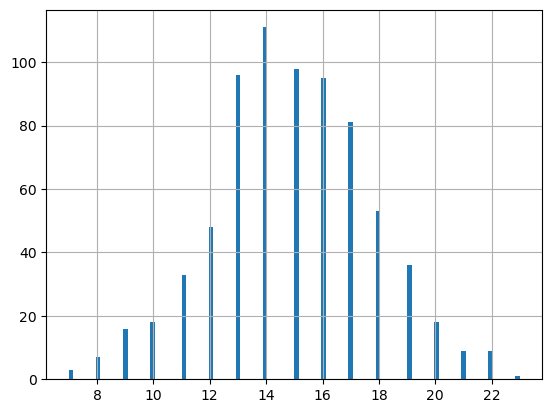

In [203]:
df_continuous_dx['gds_total'].hist(bins=100)

In [204]:
df_continuous_dx['gds_total'].describe()

count    732.000000
mean      14.913934
std        2.807450
min        7.000000
25%       13.000000
50%       15.000000
75%       17.000000
max       23.000000
Name: gds_total, dtype: float64

In [205]:
# fill nan values in gds with mean
df_continuous_dx['gds_total'] = df_continuous_dx['gds_total'].fillna(df_continuous_dx['gds_total'].mean())

In [206]:
df_continuous_dx.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      84
family_dementia_history     0
ptau_result                 0
ttau_result                 0
abeta42_result              0
mmse_total                  0
gds_total                   0
cdr_sob                     0
LHVL                        0
LHVR                        0
LWMV                        0
DX                          0
dtype: int64

And now: how do we deal with the missing values in APOE4? Do we remove the rows, the column or just replace the missing values with the most frequent category

In [207]:
df_continuous_dx['APOE4'].value_counts()

APOE4
0.0    358
1.0    226
2.0    145
Name: count, dtype: int64

<Axes: >

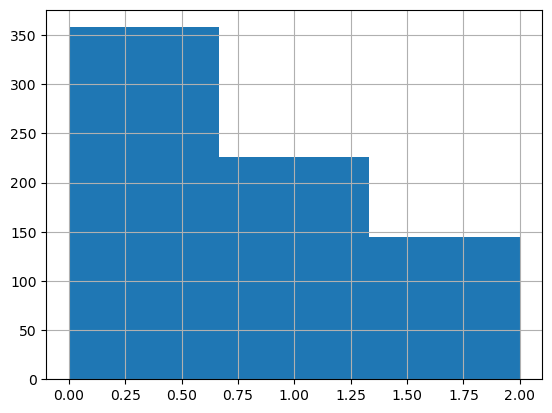

In [208]:
df_continuous_dx['APOE4'].hist(bins=3)

In [209]:
df_continuous_dx = df_continuous_dx.dropna(axis=0, subset=['APOE4'], inplace=False)
df_categorical_dx = df_categorical_dx.dropna(axis=0, subset=['APOE4'], inplace=False)

In [176]:
# df_continuous_dx['APOE4'] = df_continuous_dx['APOE4'].fillna(0.0)
# df_categorical_dx['APOE4'] = df_categorical_dx['APOE4'].fillna(0.0)

In [210]:
df_continuous_dx.isnull().sum()

Unnamed: 0                 0
sex                        0
age_years                  0
years_education            0
APOE4                      0
family_dementia_history    0
ptau_result                0
ttau_result                0
abeta42_result             0
mmse_total                 0
gds_total                  0
cdr_sob                    0
LHVL                       0
LHVR                       0
LWMV                       0
DX                         0
dtype: int64

In [211]:
df_continuous_dx.shape

(729, 16)

In [179]:
df_categorical_dx.dtypes

Unnamed: 0                   int64
sex                         object
age_years                    int64
years_education              int64
APOE4                      float64
family_dementia_history     object
AMYL                       float64
TAUO                       float64
NEUROD                     float64
mmse_total                 float64
Depression                    bool
cdr_sob                    float64
LHVL                       float64
LHVR                       float64
VASCULAR                   float64
DX                          object
dtype: object

In [212]:
# # save
# df_continuous_dx.to_csv('clean_tables/3_ready_to_train/df_continuous_dx')
# df_categorical_dx.to_csv('clean_tables/3_ready_to_train/df_categorical_dx')

# AMYL prediction - preparing dataset

In [219]:
df_continuous_AMYL = pd.read_csv('clean_tables/2_preparing_to_train/df_continuous_AMYL')
df_categorical_AMYL = pd.read_csv('clean_tables/2_preparing_to_train/df_categorical_AMYL')

In [220]:
df_continuous_AMYL.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      94
family_dementia_history     0
ptau_result                 0
ttau_result                 0
mmse_total                 82
gds_total                  87
DX                         87
cdr_sob                    87
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
AMYL                        0
dtype: int64

In [221]:
df_continuous_AMYL.shape

(900, 17)

In [222]:
df_continuous_AMYL['cdr_sob'].value_counts()

cdr_sob
0.0     138
1.5      51
3.5      48
0.5      46
4.5      44
11.5     44
14.5     43
2.5      42
5.5      41
16.5     40
8.5      36
12.5     35
9.5      33
10.5     33
6.5      31
17.5     30
15.5     28
13.5     26
7.5      24
Name: count, dtype: int64

In [223]:
df_continuous_AMYL = df_continuous_AMYL.dropna(axis=0, subset=['APOE4'], inplace=False)

In [224]:
df_continuous_AMYL.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
ptau_result                 0
ttau_result                 0
mmse_total                 76
gds_total                  81
DX                         77
cdr_sob                    77
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
AMYL                        0
dtype: int64

In [225]:
df_continuous_AMYL = df_continuous_AMYL.dropna(axis=0, subset=['DX'], inplace=False)

In [226]:
df_continuous_AMYL.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
ptau_result                 0
ttau_result                 0
mmse_total                 75
gds_total                  76
DX                          0
cdr_sob                     0
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
AMYL                        0
dtype: int64

<Axes: >

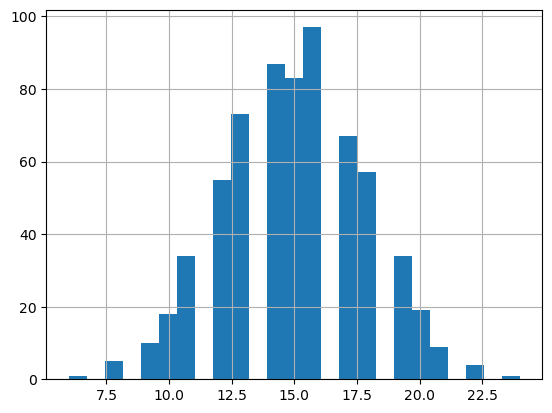

In [227]:
df_continuous_AMYL['mmse_total'].hist(bins=25)

In [229]:
df_continuous_AMYL['mmse_total'] = df_continuous_AMYL['mmse_total'].fillna(df_continuous_AMYL['mmse_total'].mean())
df_continuous_AMYL['gds_total'] = df_continuous_AMYL['gds_total'].fillna(df_continuous_AMYL['gds_total'].mean())

In [230]:
df_continuous_AMYL.isnull().sum()

Unnamed: 0                 0
sex                        0
age_years                  0
years_education            0
APOE4                      0
family_dementia_history    0
ptau_result                0
ttau_result                0
mmse_total                 0
gds_total                  0
DX                         0
cdr_sob                    0
LHVL                       0
LHVR                       0
LHV                        0
LWMV                       0
AMYL                       0
dtype: int64

In [231]:
df_continuous_AMYL.shape

(729, 17)

In [233]:
df_categorical_AMYL.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      94
family_dementia_history     0
TAUO                        0
NEUROD                      0
mmse_total                 82
Depression                  0
cdr_sob                    87
DX                         87
LHVL                        0
LHVR                        0
LHV                         0
VASCULAR                    0
AMYL                        0
dtype: int64

In [234]:
df_categorical_AMYL = df_categorical_AMYL.dropna(axis=0, subset=['APOE4'], inplace=False)

In [235]:
df_categorical_AMYL.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
TAUO                        0
NEUROD                      0
mmse_total                 76
Depression                  0
cdr_sob                    77
DX                         77
LHVL                        0
LHVR                        0
LHV                         0
VASCULAR                    0
AMYL                        0
dtype: int64

In [236]:
df_categorical_AMYL = df_categorical_AMYL.dropna(axis=0, subset=['DX'], inplace=False)    

In [238]:
df_categorical_AMYL.isnull().sum() 

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
TAUO                        0
NEUROD                      0
mmse_total                 75
Depression                  0
cdr_sob                     0
DX                          0
LHVL                        0
LHVR                        0
LHV                         0
VASCULAR                    0
AMYL                        0
dtype: int64

<Axes: >

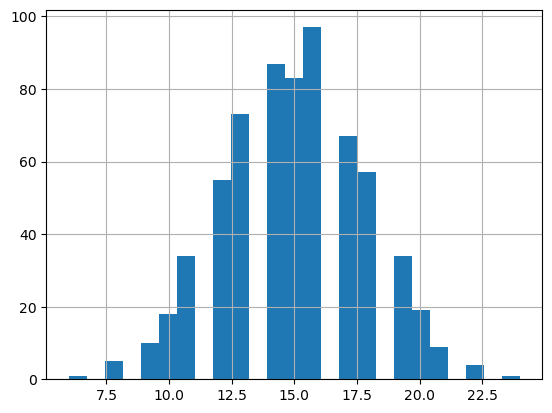

In [240]:
df_categorical_AMYL['mmse_total'].hist(bins=25)

In [241]:
df_categorical_AMYL['mmse_total'] = df_categorical_AMYL['mmse_total'].fillna(df_categorical_AMYL['mmse_total'].mean())

In [243]:
df_categorical_AMYL.isnull().sum()

Unnamed: 0                 0
sex                        0
age_years                  0
years_education            0
APOE4                      0
family_dementia_history    0
TAUO                       0
NEUROD                     0
mmse_total                 0
Depression                 0
cdr_sob                    0
DX                         0
LHVL                       0
LHVR                       0
LHV                        0
VASCULAR                   0
AMYL                       0
dtype: int64

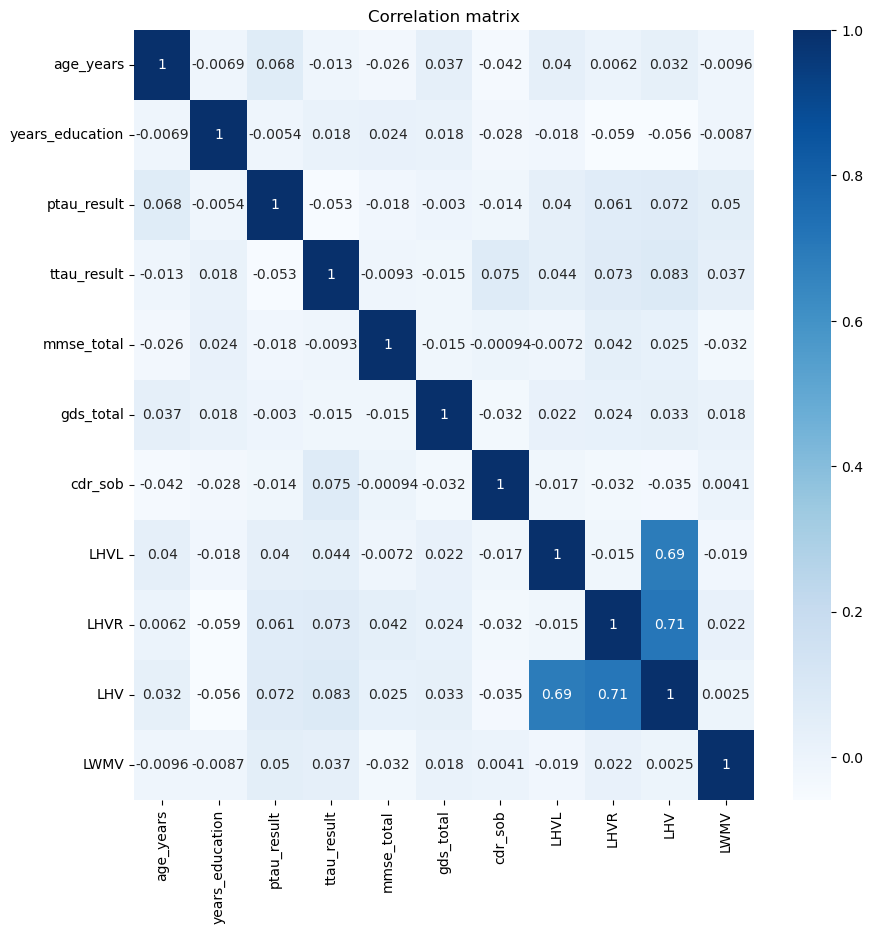

In [7]:
# find correlation between two columns in a dataframe
correlation_matrix = df_continuous_AMYL[['age_years','years_education', 'ptau_result', 'ttau_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LHV', 'LWMV']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix')
plt.show()

In [8]:
df_continuous_AMYL = df_continuous_AMYL.drop(columns=['LHV'])
df_categorical_AMYL = df_categorical_AMYL.drop(columns=['LHV'])

In [9]:
# store
# df_continuous_AMYL.to_csv('clean_tables/3_ready_to_train/df_continuous_AMYL')
# df_categorical_AMYL.to_csv('clean_tables/3_ready_to_train/df_categorical_AMYL')

# DX_CHANGE prediction - preparing dataset

In [31]:
df_continuous_dx_change = pd.read_csv('clean_tables/2_preparing_to_train/df_continuous_dx_change')
df_categorical_dx_change = pd.read_csv('clean_tables/2_preparing_to_train/df_categorical_dx_change')

In [32]:
df_continuous_dx_change.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                      90
family_dementia_history     0
abeta42_result              0
ptau_result                 0
ttau_result                 0
mmse_total                 81
gds_total                  87
cdr_sob                    68
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
dx_change                   0
dtype: int64

In [33]:
df_continuous_dx_change = df_continuous_dx_change.dropna(axis=0, subset=['APOE4'], inplace=False)
df_categorical_dx_change = df_categorical_dx_change.dropna(axis=0, subset=['APOE4'], inplace=False)

In [34]:
df_continuous_dx_change.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
abeta42_result              0
ptau_result                 0
ttau_result                 0
mmse_total                 75
gds_total                  81
cdr_sob                    61
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
dx_change                   0
dtype: int64

<Axes: >

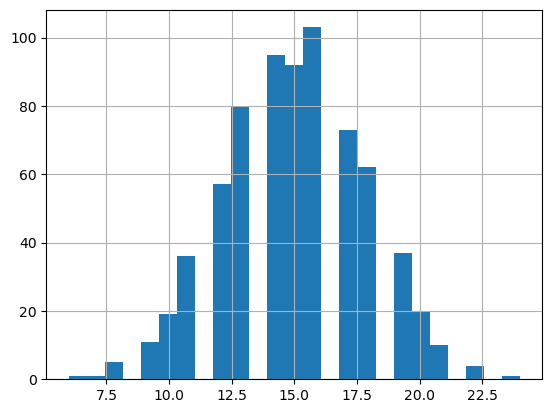

In [35]:
df_continuous_dx_change['mmse_total'].hist(bins=25)

In [36]:
df_continuous_dx_change['mmse_total'] = df_continuous_dx_change['mmse_total'].fillna(df_continuous_dx_change['mmse_total'].mean())
df_categorical_dx_change['mmse_total'] = df_categorical_dx_change['mmse_total'].fillna(df_categorical_dx_change['mmse_total'].mean())

In [37]:
df_continuous_dx_change.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
abeta42_result              0
ptau_result                 0
ttau_result                 0
mmse_total                  0
gds_total                  81
cdr_sob                    61
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
dx_change                   0
dtype: int64

In [38]:
df_continuous_dx_change = df_continuous_dx_change.dropna(axis=0, subset=['cdr_sob'], inplace=False)
df_categorical_dx_change = df_categorical_dx_change.dropna(axis=0, subset=['cdr_sob'], inplace=False)

In [39]:
df_continuous_dx_change.isnull().sum()

Unnamed: 0                  0
sex                         0
age_years                   0
years_education             0
APOE4                       0
family_dementia_history     0
abeta42_result              0
ptau_result                 0
ttau_result                 0
mmse_total                  0
gds_total                  76
cdr_sob                     0
LHVL                        0
LHVR                        0
LHV                         0
LWMV                        0
dx_change                   0
dtype: int64

In [41]:
df_continuous_dx_change['gds_total'] = df_continuous_dx_change['gds_total'].fillna(df_continuous_dx_change['gds_total'].mean())

In [43]:
df_continuous_dx_change.isnull().sum()

Unnamed: 0                 0
sex                        0
age_years                  0
years_education            0
APOE4                      0
family_dementia_history    0
abeta42_result             0
ptau_result                0
ttau_result                0
mmse_total                 0
gds_total                  0
cdr_sob                    0
LHVL                       0
LHVR                       0
LHV                        0
LWMV                       0
dx_change                  0
dtype: int64

In [44]:
df_categorical_dx_change.columns

Index(['Unnamed: 0', 'sex', 'age_years', 'years_education', 'APOE4',
       'family_dementia_history', 'AMYL', 'TAUO', 'NEUROD', 'mmse_total',
       'Depression', 'cdr_sob', 'LHVL', 'LHVR', 'LHV', 'VASCULAR',
       'dx_change'],
      dtype='object')

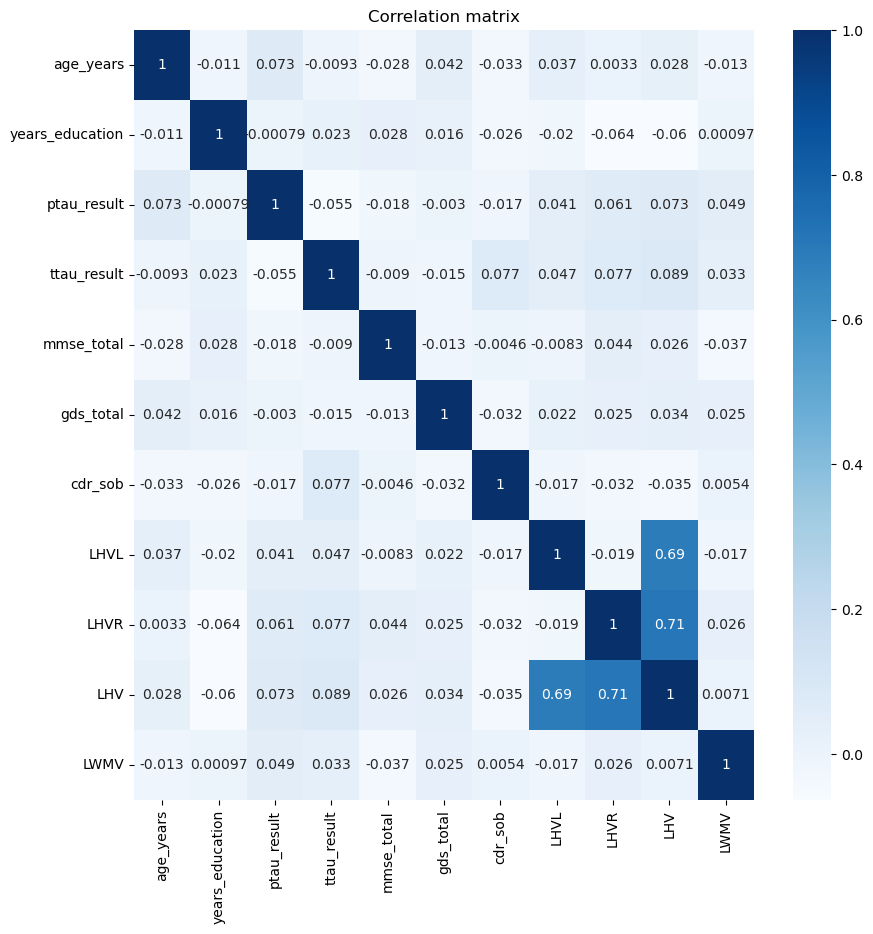

In [45]:
# find correlation between two columns in a dataframe
correlation_matrix = df_continuous_dx_change[['age_years','years_education', 'ptau_result', 'ttau_result', 'mmse_total', 'gds_total', 'cdr_sob', 'LHVL', 'LHVR',
       'LHV', 'LWMV']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation matrix')
plt.show()

In [46]:
df_continuous_dx_change = df_continuous_dx_change.drop(columns=['LHV'])
df_categorical_dx_change = df_categorical_dx_change.drop(columns=['LHV'])

In [47]:
# store
# df_continuous_dx_change.to_csv('clean_tables/3_ready_to_train/df_continuous_dx_change')
# df_categorical_dx_change.to_csv('clean_tables/3_ready_to_train/df_categorical_dx_change')